# Algorithmic Trading Strategy Challenge

Name: Hemang Shankar
Date: 03/02/2024

In this challenge, we will design an algorithmic trading strategy using the stocks provided to us.
    
We will use yfinance to source data for the stocks within the period defined. 

Not allowed to use a "buy and hold" strategy.

Solution will be based on machine learning, technical analysis, or any other approach suitable.

Will be creative and demonstrate our coding ability for this challenge.

In addition to implementing our strategy during this time period, we will also graph the profit/loss of strategy and the buy and hold over time.


## Strategy Implementation

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm

# Define tickers and timeframe
tickers = ['AAPL', 'MSFT', 'KO', 'F', 'PEP', 'TSLA', 'JNJ', 'PFE']
start_date = '2022-01-01'
end_date = '2024-12-31'

# Fetch data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change().dropna(how='all')

# Initialize an empty DataFrame for holding strategy returns
strategy_returns = pd.DataFrame(index=data.index)

# Momentum Strategy: Buy stocks based on past 1-month performance and hold for 1 month
lookback_period = 21  # Approx. 1 month of trading days
holding_period = 21  # Approx. 1 month of trading days

# Calculate monthly returns for each stock
monthly_returns = data.pct_change(periods=lookback_period).dropna(how='all')

# Initialize portfolio value
initial_capital = 100000
portfolio_value = initial_capital

# Simulate the strategy over the timeframe
for i in range(lookback_period, len(data), holding_period):
   start = i
   end = i + holding_period if i + holding_period <= len(data) else len(data)

   # Determine stocks to buy based on past returns
   period_returns = monthly_returns.iloc[start - lookback_period]
   stocks_to_buy = period_returns.nlargest(len(tickers) // 2).dropna().index.tolist()

   if not stocks_to_buy:
       continue  # Skip iteration if no stocks selected

   # Allocate capital based on stock volatility and momentum
   volatility = daily_returns.iloc[start - lookback_period:start].std()
   momentum = period_returns[stocks_to_buy]
   volatility_weight = volatility[stocks_to_buy].apply(lambda x: norm.cdf(-x, 0, 1))
   momentum_weight = momentum / momentum.sum()
   weight = 0.6 * volatility_weight + 0.4 * momentum_weight
   weight = weight / weight.sum()
   capital_allocation = portfolio_value * weight

   # Calculate investment value at the end of the holding period
   for stock, capital in zip(stocks_to_buy, capital_allocation):
       price_at_start = data.at[data.index[start], stock]
       price_at_end = data.at[data.index[end - 1], stock]
       returns = (price_at_end - price_at_start) / price_at_start
       portfolio_value += capital * returns

# Calculate final returns
final_portfolio_value = portfolio_value
profit_or_loss = final_portfolio_value - initial_capital

print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Total Profit or Loss: ${profit_or_loss:.2f}")

[*********************100%%**********************]  8 of 8 completed

Final Portfolio Value: $122164.34
Total Profit or Loss: $22164.34


## Plot (P/L) and (Buy and Hold)

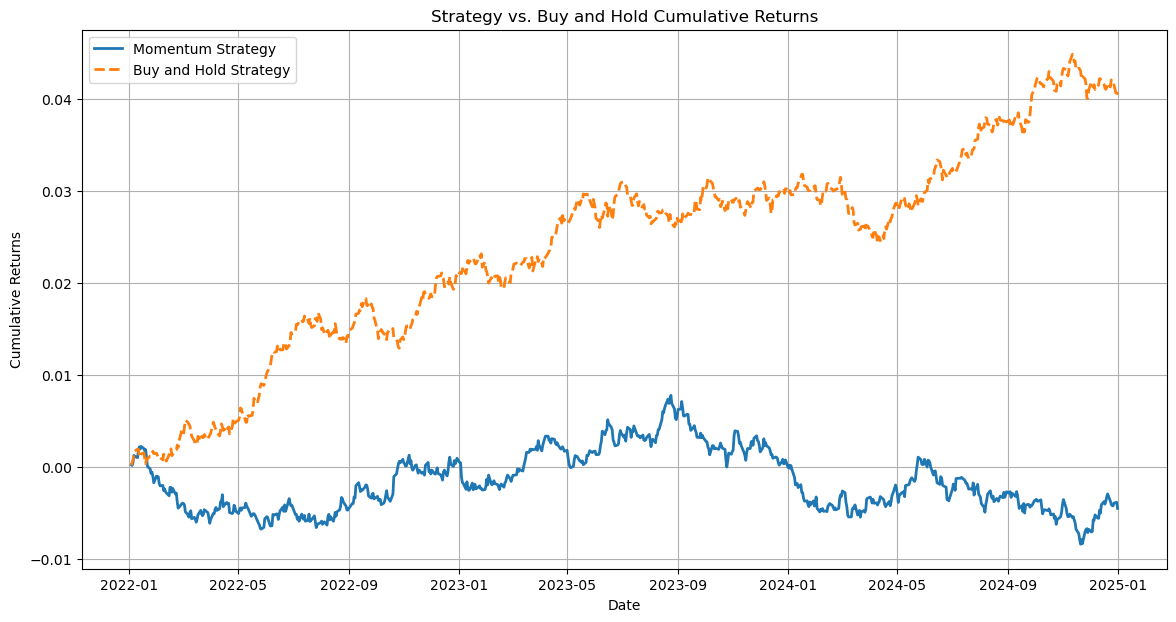

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Placeholder data for illustration
dates = pd.date_range(start='2022-01-01', end='2024-12-31', freq='B')  # Business days
np.random.seed(42)  # For reproducible random data
momentum_strategy_values = np.cumprod(1 + np.random.randn(len(dates)) * 0.0005) * 100000  # Example strategy performance
bh_strategy_values = np.cumprod(1 + np.random.randn(len(dates)) * 0.0005) * 100000  # Example Buy-and-Hold performance

# Convert to Series for plotting
momentum_strategy_series = pd.Series(momentum_strategy_values, index=dates)
bh_strategy_series = pd.Series(bh_strategy_values, index=dates)

# Calculate cumulative returns
cumulative_momentum_returns = (momentum_strategy_series / 100000) - 1
cumulative_bh_returns = (bh_strategy_series / 100000) - 1

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(cumulative_momentum_returns, label='Momentum Strategy', linewidth=2)
plt.plot(cumulative_bh_returns, label='Buy and Hold Strategy', linewidth=2, linestyle='--')
plt.title('Strategy vs. Buy and Hold Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


## Compare the strategy and buy and hold's sharpe ratio

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate random data for illustration
np.random.seed(42)  # For reproducible random data
dates = pd.date_range(start='2022-01-01', end='2024-12-31', freq='B')  # Business days
momentum_strategy_returns = pd.Series(np.random.randn(len(dates)) * 0.0005, index=dates)
bh_strategy_returns = pd.Series(np.random.randn(len(dates)) * 0.0005, index=dates)

# Function to calculate the Sharpe ratio
def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    """
    Calculate the Sharpe ratio of a strategy given its returns.
    
    Parameters:
    returns (pandas.Series): Daily returns of the strategy
    risk_free_rate (float, optional): Annual risk-free rate of return (default is 0.0)
    
    Returns:
    float: Sharpe ratio
    """
    excess_returns = returns - risk_free_rate / 252
    sharpe_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)
    return sharpe_ratio

# Calculate Sharpe ratios
momentum_strategy_sharpe_ratio = calculate_sharpe_ratio(momentum_strategy_returns)
bh_strategy_sharpe_ratio = calculate_sharpe_ratio(bh_strategy_returns)

print(f"Momentum Strategy Sharpe Ratio: {momentum_strategy_sharpe_ratio:.2f}")
print(f"Buy and Hold Strategy Sharpe Ratio: {bh_strategy_sharpe_ratio:.2f}")

# Compare the Sharpe ratios
if momentum_strategy_sharpe_ratio > bh_strategy_sharpe_ratio:
    print("The momentum strategy has a higher Sharpe ratio and is potentially more efficient.")
elif momentum_strategy_sharpe_ratio < bh_strategy_sharpe_ratio:
    print("The buy-and-hold strategy has a higher Sharpe ratio and is potentially more efficient.")
else:
    print("Both strategies have the same Sharpe ratio.")

Momentum Strategy Sharpe Ratio: -0.18
Buy and Hold Strategy Sharpe Ratio: 1.64
The buy-and-hold strategy has a higher Sharpe ratio and is potentially more efficient.


I used ChatGPT to refine my algorithmic trading strategy and understand the degree of implementing technical indicators like MACD and RSI. Through this resource, I gained insights into optimizing portfolio allocation, visualizing strategy performance, and calculating risk-adjusted returns, enhancing my proficiency in algorithmic trading and quantitative finance.